# Generating our own data for QSVM (Construct circuit and Construct Kernel Matrix methods)

In [1]:
from scripts.datasets import *
%matplotlib inline
from scripts.QC_helper import *

from qiskit.aqua.utils import split_dataset_to_data_and_labels
from qiskit.aqua.utils import map_label_to_class_name
from qiskit.aqua.input import ClassificationInput

In [2]:
np.random.seed(seed = 55) # if new data is desired, comment this line out
A_train_data = np.random.random_sample((20,2)) * 5
B_train_data = 5*np.random.random_sample((20,2)) + 5.75
training_data = {
    'a' : A_train_data,
    'b' : B_train_data
}

In [3]:
import matplotlib.pyplot as plt

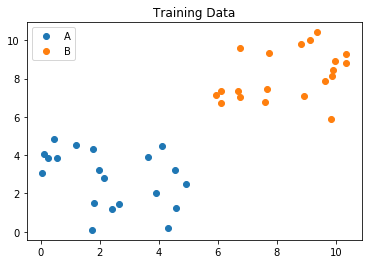

In [4]:
# plot the training data
plt.plot(A_train_data[:, 0], A_train_data[:, 1], 'o', label = 'A')
plt.plot(B_train_data[:,0], B_train_data[:,1], 'o', label = 'B') 

plt.title("Training Data")
plt.legend()
plt.show()

In [5]:
print(A_train_data)
print(B_train_data)

[[0.46554143 4.8582796 ]
 [2.4192999  1.21261351]
 [2.65561915 1.42772118]
 [4.31315189 0.20550077]
 [0.54173867 3.83580023]
 [0.25714354 3.87858269]
 [0.04569471 3.09156057]
 [4.09354666 4.49292861]
 [4.92805791 2.48372461]
 [1.76159463 4.33542497]
 [1.98440873 3.2182861 ]
 [0.10226657 4.04042271]
 [2.14806651 2.79273261]
 [3.89555645 2.01278562]
 [4.53997459 3.24984805]
 [3.63636114 3.8978052 ]
 [1.75363724 0.0982996 ]
 [1.79279285 1.51612726]
 [4.59530996 1.26698465]
 [1.20577386 4.54961574]]
[[ 9.63407675  7.89882938]
 [10.35895179  9.28849839]
 [ 6.10884711  7.36040555]
 [ 9.97559781  8.92846475]
 [ 8.82692067  9.79157201]
 [ 8.93219045  7.08710035]
 [ 7.67777301  7.4747888 ]
 [ 6.75164874  7.0511594 ]
 [ 9.11351515  9.99182893]
 [ 6.76387531  9.60566786]
 [ 9.90549643  8.44628533]
 [ 7.61231587  6.76590892]
 [ 6.68962829  7.36852731]
 [ 6.11164686  6.71610286]
 [10.34390656  8.81798837]
 [ 5.93634494  7.12074241]
 [ 9.3665023  10.4203149 ]
 [ 7.74111542  9.33521217]
 [ 9.82732552

In [6]:
# quickly Normalize the data
def normalize_data (A_data, B_data):
    if (np.max(A_data) > np.max(B_data)):
        max = np.max(A_data)
    else:
        max = np.max(B_data)
    norm_A = A_data/max
    norm_B = B_data/max
    return norm_A, norm_B

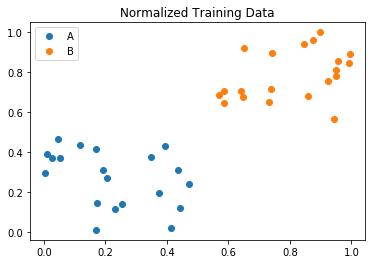

In [7]:
A_train_norm, B_train_norm = normalize_data(A_train_data, B_train_data)

plt.plot(A_train_norm[:, 0], A_train_norm[:, 1], 'o', label = 'A')
plt.plot(B_train_norm[:,0], B_train_norm[:,1], 'o', label = 'B') 

plt.title("Normalized Training Data")
plt.legend()
plt.show()

In [8]:
# put data into dictionary
training_norm_data = {
    'A' : A_train_norm,
    'B' : B_train_norm
}

In [9]:
# quickly create testing set
# i.e. change the seed and matrix length, and repeat the process above (without visualization)
# we do not want to see this data, we just want to confirm that it is actually different.
np.random.seed(seed = 75) # if new data is desired, comment this line out
A_test_data = np.random.random_sample((10,2)) * 5
B_test_data = 5*np.random.random_sample((10,2)) + 5.75
print(A_test_data)

[[2.8447011  0.32982114]
 [4.44055335 4.64829089]
 [3.39846021 2.72137908]
 [0.93924671 3.09131731]
 [1.87063884 4.66791084]
 [3.24070601 3.35895589]
 [4.65786784 3.34994043]
 [1.16062256 1.27917176]
 [1.12495912 0.40350328]
 [0.92000121 3.62474684]]


In [10]:
A_test_norm, B_test_norm = normalize_data(A_test_data, B_test_data)
testing_norm_data = {
    'A' : A_test_norm,
    'B' : B_test_norm
}

# Begin QSVM

In [11]:
feature_dim = 2
seed = 10598
feature_map = SecondOrderExpansion (feature_dimension = feature_dim,
                                   depth = 2,
                                   entanglement = 'linear')

In [12]:
qsvm = QSVM(feature_map, training_norm_data, testing_norm_data)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots = 1024, seed = seed,
                                  seed_transpiler = seed)

In [13]:
qsvm_results = qsvm.run(quantum_instance)

# look at the success rate 
# (should be 100 % accuracy considering how nicely our data is placed)
print(f"Sucess Ratio (0-1) = {qsvm_results['testing_accuracy']}")

Sucess Ratio (0-1) = 1.0


# View the Quantum Circuits 
using the scripts I previously prepared

In [14]:
num_desired_circuits = 4
test_data_for_qc = prepare_data_set_for_qc(num_desired_circuits,
                                               A_train_norm,
                                               B_train_norm)
draw_circuits(qsvm, test_data_for_qc, add_measurement = True)

Circuit for: x(0) transpose * x(0)
circuit info:
	circuit depth =  21 	circuit width =  4
Circuit operation breakdown:
	 {'u2': 8, 'u1': 12, 'cx': 8, 'barrier': 1, 'measure': 2}
        ┌──────────┐┌──────────────┐                        ┌──────────┐»
q_0: |0>┤ U2(0,pi) ├┤ U1(0.089353) ├──■──────────────────■──┤ U2(0,pi) ├»
        ├──────────┤├─────────────┬┘┌─┴─┐┌────────────┐┌─┴─┐├──────────┤»
q_1: |0>┤ U2(0,pi) ├┤ U1(0.93246) ├─┤ X ├┤ U1(16.571) ├┤ X ├┤ U2(0,pi) ├»
        └──────────┘└─────────────┘ └───┘└────────────┘└───┘└──────────┘»
 c_0: 0 ════════════════════════════════════════════════════════════════»
                                                                        »
 c_1: 0 ════════════════════════════════════════════════════════════════»
                                                                        »
«     ┌──────────────┐                                                 »
«q_0: ┤ U1(0.089353) ├──■──────────────────■────■───────────────────■──»
«     ├───

In [16]:
kernel_A_train = qsvm.construct_kernel_matrix(A_train_norm)
kernel_B_train = qsvm.construct_kernel_matrix(B_train_norm)
kernel_qc = qsvm.construct_kernel_matrix(test_data_for_qc)

In [17]:
print(kernel_A_train)

[[1.         0.66503906 0.77246094 0.84570312 0.86132812 0.79394531
  0.46972656 0.38183594 0.64648438 0.9453125  0.95898438 0.79882812
  0.92382812 0.89746094 0.58496094 0.66308594 0.19921875 0.56054688
  0.859375   0.98535156]
 [0.66503906 1.         0.97851562 0.87988281 0.90136719 0.92089844
  0.93359375 0.02050781 0.13671875 0.48632812 0.76757812 0.91308594
  0.83789062 0.53222656 0.10058594 0.14355469 0.71777344 0.99023438
  0.50683594 0.56933594]
 [0.77246094 0.97851562 1.         0.9453125  0.95019531 0.95410156
  0.88574219 0.06835938 0.22949219 0.62597656 0.87695312 0.94824219
  0.91796875 0.6796875  0.17480469 0.2421875  0.578125   0.93457031
  0.65625    0.69433594]
 [0.84570312 0.87988281 0.9453125  1.         0.91601562 0.90625
  0.75390625 0.16894531 0.36132812 0.75488281 0.92089844 0.90234375
  0.95019531 0.81445312 0.30957031 0.40722656 0.38085938 0.79785156
  0.79394531 0.79980469]
 [0.86132812 0.90136719 0.95019531 0.91601562 1.         0.99609375
  0.81152344 0.1240

In [18]:
print(kernel_B_train)

[[1.         0.9453125  0.83984375 0.96875    0.96777344 0.95019531
  0.90429688 0.84667969 0.95117188 0.96875    0.9921875  0.86132812
  0.85546875 0.84472656 0.95898438 0.83886719 0.91992188 0.99511719
  0.91796875 0.99804688]
 [0.9453125  1.         0.77929688 0.99609375 0.96582031 0.84472656
  0.79394531 0.77636719 0.96875    0.87304688 0.98339844 0.76757812
  0.77636719 0.79785156 1.         0.78515625 0.96582031 0.90917969
  0.80859375 0.96777344]
 [0.83984375 0.77929688 1.         0.78125    0.77636719 0.91113281
  0.95410156 0.99511719 0.765625   0.89941406 0.79394531 0.96386719
  0.99609375 0.99707031 0.77929688 1.         0.765625   0.85351562
  0.90136719 0.80566406]
 [0.96875    0.99609375 0.78125    1.         0.98632812 0.87988281
  0.81835938 0.78222656 0.98535156 0.90136719 0.99804688 0.78222656
  0.78320312 0.79785156 1.         0.78515625 0.96582031 0.94140625
  0.84472656 0.99316406]
 [0.96777344 0.96582031 0.77636719 0.98632812 1.         0.89746094
  0.84179688 0.7